# Priprema skupa podataka

For this experiment I will use data from PersonalityCafe forum.

In [100]:
import numpy as np
import pandas as pd
import nltk
raw_data = pd.read_csv('../data/raw/mbti_1.csv')
print(raw_data.shape)

(8675, 2)


## 2. Exploratory data analysis

Dataset has 8675 rows and two columns. The first column is a personality datatype, and the second one is the last 50 words of the forum post. Personality type has a four-letter label, and post text is divided with '|||'. We can notice, besides the text, links, emoticons, and special symbols.

In [101]:
print(raw_data['type'][0])
print(raw_data['posts'][0])

INFJ
'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg

This dataset is very imbalanced.

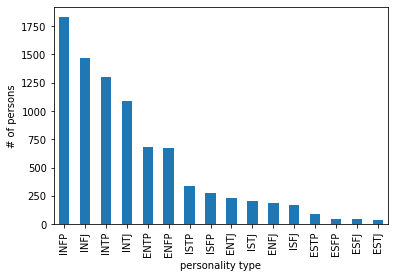

In [102]:
import matplotlib.pyplot as plt

plt.figure()
counts = raw_data['type'].value_counts()
counts.plot(kind='bar')
plt.xlabel('personality type')
plt.ylabel('# of persons')
plt.show()

Some personality types are dominant (like INFP), and some are very rare (like ESTJ).

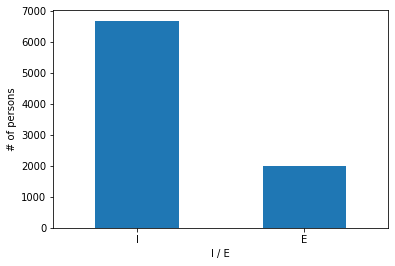

In [103]:
raw_data['I/E'] = [t[0] for t in raw_data['type']]

plt.figure()
counts = raw_data['I/E'].value_counts()
counts.plot(kind='bar')
plt.xlabel('I / E')
plt.xticks(rotation=0)
plt.ylabel('# of persons')
plt.show()

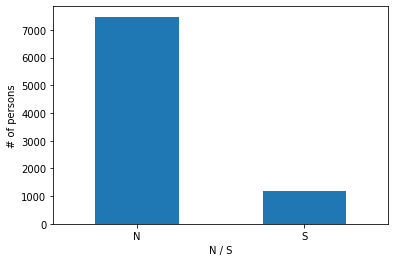

In [104]:
raw_data['N/S'] = [t[1] for t in raw_data['type']]

plt.figure()
counts = raw_data['N/S'].value_counts()
counts.plot(kind='bar')
plt.xlabel('N / S')
plt.xticks(rotation=0)
plt.ylabel('# of persons')
plt.show()

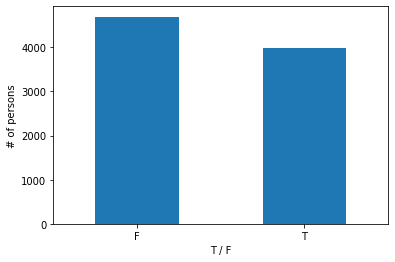

In [105]:
raw_data['T/F'] = [t[2] for t in raw_data['type']]

plt.figure()
counts = raw_data['T/F'].value_counts()
counts.plot(kind='bar')
plt.xlabel('T / F')
plt.xticks(rotation=0)
plt.ylabel('# of persons')
plt.show()

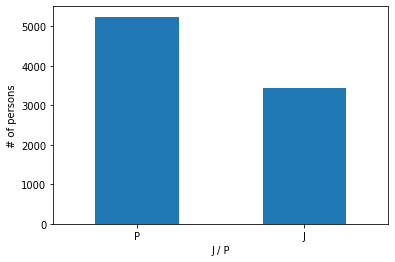

In [106]:
raw_data['J/P'] = [t[3] for t in raw_data['type']]

plt.figure()
counts = raw_data['J/P'].value_counts()
counts.plot(kind='bar')
plt.xlabel('J / P')
plt.xticks(rotation=0)
plt.ylabel('# of persons')
plt.show()

## 3. Text preprocessing

Text preprocessing will enable better results in model learning.

In [107]:
#install just the first time
#!pip install contractions

In [108]:
import re
from string import punctuation
import contractions

def remove_unwanted_parts(text):
    text = re.sub(r'\|\|\|', ' ', text)  # remove |||
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub('\d+', '', text) # remove numbers
    text = contractions.fix(text) # change contractions (like I'm --> I am)
    text = re.sub(r'(?<=[.,!?()])(?=[^\s])', r' ', text) # add space after comma or the end of the sentence
    text = re.sub(r'(?<!\w)['+ punctuation +']+|[' + punctuation + ']+(?!\w)', '', text) # remove interpunctions if they are outside the word
    text = re.sub(r'(?<=\w)/(?=\w)', ' ', text) # divide words separated with /
    text = re.sub(r'\s{2,}', ' ', text) # 2 or more spaces replace with one space
    return text

clean_data = raw_data.copy()
clean_data['posts'] = [remove_unwanted_parts(entry) for entry in clean_data['posts']]

Convert all words to lowercase.

In [109]:
clean_data['posts'] = [entry.lower() for entry in clean_data['posts']]

In [110]:
print(clean_data['posts'][0])

 enfp and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your life on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace hello enfj sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i do not mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items you have determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims is indeed a video game and a good one at that note a good one at

In [111]:
#Tokenization. We will split the sentence according to the space, keeping in mind the previous steps.
clean_data['posts'] = [post.split() for post in clean_data['posts']]
print(clean_data['posts'][0])

['enfp', 'and', 'intj', 'moments', 'sportscenter', 'not', 'top', 'ten', 'plays', 'pranks', 'what', 'has', 'been', 'the', 'most', 'life-changing', 'experience', 'in', 'your', 'life', 'on', 'repeat', 'for', 'most', 'of', 'today', 'may', 'the', 'perc', 'experience', 'immerse', 'you', 'the', 'last', 'thing', 'my', 'infj', 'friend', 'posted', 'on', 'his', 'facebook', 'before', 'committing', 'suicide', 'the', 'next', 'day', 'rest', 'in', 'peace', 'hello', 'enfj', 'sorry', 'to', 'hear', 'of', 'your', 'distress', 'it', 'is', 'only', 'natural', 'for', 'a', 'relationship', 'to', 'not', 'be', 'perfection', 'all', 'the', 'time', 'in', 'every', 'moment', 'of', 'existence', 'try', 'to', 'figure', 'the', 'hard', 'times', 'as', 'times', 'of', 'growth', 'as', 'welcome', 'and', 'stuff', 'game', 'set', 'match', 'prozac', 'wellbrutin', 'at', 'least', 'thirty', 'minutes', 'of', 'moving', 'your', 'legs', 'and', 'i', 'do', 'not', 'mean', 'moving', 'them', 'while', 'sitting', 'in', 'your', 'same', 'desk', 'ch

In [112]:
#Removing stopwords (like 'a', 'and', 'for').
# It is normal to remove stopwords. However, since there are researches that show that their
# impact to the personality type is important, this step is skipped!

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(words_list):
    filtered_words = [word for word in words_list if word not in stop_words]
    return filtered_words

clean_data['posts'] = [remove_stopwords(entry) for entry in clean_data['posts']]
print(stop_words)

In [113]:
# remove the one-letter words
def remove_letters(words_list):
    filtered_words = [word for word in words_list if len(word) > 1]
    return filtered_words

clean_data['posts'] = [remove_letters(entry) for entry in clean_data['posts']]

print(clean_data['posts'][0])

['enfp', 'and', 'intj', 'moments', 'sportscenter', 'not', 'top', 'ten', 'plays', 'pranks', 'what', 'has', 'been', 'the', 'most', 'life-changing', 'experience', 'in', 'your', 'life', 'on', 'repeat', 'for', 'most', 'of', 'today', 'may', 'the', 'perc', 'experience', 'immerse', 'you', 'the', 'last', 'thing', 'my', 'infj', 'friend', 'posted', 'on', 'his', 'facebook', 'before', 'committing', 'suicide', 'the', 'next', 'day', 'rest', 'in', 'peace', 'hello', 'enfj', 'sorry', 'to', 'hear', 'of', 'your', 'distress', 'it', 'is', 'only', 'natural', 'for', 'relationship', 'to', 'not', 'be', 'perfection', 'all', 'the', 'time', 'in', 'every', 'moment', 'of', 'existence', 'try', 'to', 'figure', 'the', 'hard', 'times', 'as', 'times', 'of', 'growth', 'as', 'welcome', 'and', 'stuff', 'game', 'set', 'match', 'prozac', 'wellbrutin', 'at', 'least', 'thirty', 'minutes', 'of', 'moving', 'your', 'legs', 'and', 'do', 'not', 'mean', 'moving', 'them', 'while', 'sitting', 'in', 'your', 'same', 'desk', 'chair', 'wee

Remove the words/labels for personality types since they are very frequent.(enfp, intj, enfj...).

In [114]:
mbti_types = ['infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp',
              'enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp']

def remove_mbti_types(words_list):
    filtered_words = [word for word in words_list if word not in mbti_types]
    return filtered_words

clean_data['posts'] = [remove_mbti_types(entry) for entry in clean_data['posts']]
print(clean_data['posts'][0])

['and', 'moments', 'sportscenter', 'not', 'top', 'ten', 'plays', 'pranks', 'what', 'has', 'been', 'the', 'most', 'life-changing', 'experience', 'in', 'your', 'life', 'on', 'repeat', 'for', 'most', 'of', 'today', 'may', 'the', 'perc', 'experience', 'immerse', 'you', 'the', 'last', 'thing', 'my', 'friend', 'posted', 'on', 'his', 'facebook', 'before', 'committing', 'suicide', 'the', 'next', 'day', 'rest', 'in', 'peace', 'hello', 'sorry', 'to', 'hear', 'of', 'your', 'distress', 'it', 'is', 'only', 'natural', 'for', 'relationship', 'to', 'not', 'be', 'perfection', 'all', 'the', 'time', 'in', 'every', 'moment', 'of', 'existence', 'try', 'to', 'figure', 'the', 'hard', 'times', 'as', 'times', 'of', 'growth', 'as', 'welcome', 'and', 'stuff', 'game', 'set', 'match', 'prozac', 'wellbrutin', 'at', 'least', 'thirty', 'minutes', 'of', 'moving', 'your', 'legs', 'and', 'do', 'not', 'mean', 'moving', 'them', 'while', 'sitting', 'in', 'your', 'same', 'desk', 'chair', 'weed', 'in', 'moderation', 'maybe',

## 3. Text normalization

The next step is normalization: stemming (carrying of word roots) and lemmatization (keeping word context). For a small dataset, like this one, it is ok to lemmatize the words (I will use Part-Of-Speech/POS-tags that will categorize words according to the word types).

In [115]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ninoslav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [116]:
# Lemmatization- there should be an additional check on how lemmatization helps classify this dataset. Nevertheless, maybe, it does not help!
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lem = WordNetLemmatizer()

def normalize_words(words):
    tags = nltk.pos_tag(words)
    tags = [lem.lemmatize(v, tag_map[t[0]]) for v,t in tags]
    return tags

clean_data['posts'] = [normalize_words(entry) for entry in clean_data['posts']]
print(clean_data['posts'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ninoslav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['and', 'moment', 'sportscenter', 'not', 'top', 'ten', 'play', 'prank', 'what', 'have', 'be', 'the', 'most', 'life-changing', 'experience', 'in', 'your', 'life', 'on', 'repeat', 'for', 'most', 'of', 'today', 'may', 'the', 'perc', 'experience', 'immerse', 'you', 'the', 'last', 'thing', 'my', 'friend', 'post', 'on', 'his', 'facebook', 'before', 'commit', 'suicide', 'the', 'next', 'day', 'rest', 'in', 'peace', 'hello', 'sorry', 'to', 'hear', 'of', 'your', 'distress', 'it', 'be', 'only', 'natural', 'for', 'relationship', 'to', 'not', 'be', 'perfection', 'all', 'the', 'time', 'in', 'every', 'moment', 'of', 'existence', 'try', 'to', 'figure', 'the', 'hard', 'time', 'a', 'time', 'of', 'growth', 'a', 'welcome', 'and', 'stuff', 'game', 'set', 'match', 'prozac', 'wellbrutin', 'at', 'least', 'thirty', 'minute', 'of', 'move', 'your', 'leg', 'and', 'do', 'not', 'mean', 'move', 'them', 'while', 'sit', 'in', 'your', 'same', 'desk', 'chair', 'weed', 'in', 'moderation', 'maybe', 'try', 'edible', 'a', '

## 5. Additional analysis of the clean dataset


In [117]:
lengths_of_posts = [len(post) for post in clean_data['posts']]
avg_length = round(sum(lengths_of_posts)/len(lengths_of_posts),2)
max_length = max(lengths_of_posts)
print('Avg post length:' + str(avg_length))
print('Max post length:' + str(max_length))

Avg post length:1183.57
Max post length:1789


In [118]:
post_count = pd.Series(lengths_of_posts).value_counts()

print(post_count)

1236    24
1312    22
1351    22
1272    22
1402    21
        ..
428      1
1686     1
215      1
91       1
404      1
Length: 1353, dtype: int64


In [119]:
# in case that data pre-processing result in empty posts, remove it
clean_data = clean_data[clean_data.posts.map(len) != 0].copy()

In [120]:
freq = pd.Series([item for text in clean_data['posts'] for item in text]).value_counts()

In [121]:
print("Vocabulary size:" + str(freq.size))

Vocabulary size:111994


In [122]:
print("10 the most frequent words:")
top_10 = freq[:10]
print(top_10)

10 the most frequent words:
be      631575
the     309058
to      308231
and     243890
it      193872
you     189623
not     186834
of      185681
have    167226
that    164757
dtype: int64


In [123]:
least_freq_words = freq[freq <= 10]
print("The least frequent words: " + str(len(least_freq_words)))

The least frequent words: 96183


least_freq_words.index.tolist()

In [124]:
#in this list, we have many tip felers or rare words
print(least_freq_words)

earthbound      10
chameleoning    10
prosper         10
bookcase        10
booger          10
                ..
blackest         1
street's         1
stop's           1
krusmynt         1
ausse            1
Length: 96183, dtype: int64


## 6. Save the pre-processed dataset

In [125]:

clean_data.to_csv('../data/processed/mbti_1_processed.csv')
# list of words to text before saving
clean_data['posts'] = [' '.join(post) for post in clean_data['posts']]

# save to .pkl
clean_data.to_pickle('../data/processed/CleanMBTIPersonalityCaffe_v01.pkl')

